<a href="https://colab.research.google.com/github/Nidzo234/Stock-Price-Prediction/blob/main/Stocks_price_predicting_using_Polynominal_Regression%2C_XGBoost_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import yfinance as yf
from xgboost import XGBRegressor

In [312]:
nvidia_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/NVDA.csv")
nvidia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,13.18275,13.57500,13.03775,13.3745,13.334772,500840000
1,2020-09-01,13.48000,13.99375,13.43650,13.8210,13.784067,511316000
2,2020-09-02,14.70375,14.72675,13.90000,14.3465,14.308166,874012000
3,2020-09-03,13.82875,13.88450,12.87875,13.0155,12.980721,945128000
4,2020-09-04,12.78375,13.17500,11.70475,12.6225,12.588770,1463684000


In [164]:
intel_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/INTC.csv")
intel_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,51.000000,51.500000,50.320000,50.950001,45.727489,46114100
1,2020-09-01,50.910000,51.000000,50.220001,50.790001,45.583893,30472800
2,2020-09-02,51.209999,52.680000,51.090000,52.250000,46.894234,53000700
3,2020-09-03,52.500000,52.619999,50.139999,50.389999,45.224884,47394300
4,2020-09-04,50.529999,51.230000,49.490002,50.080002,44.946667,43318400


In [165]:
tesla_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/TSLA.csv")
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,148.203339,166.713333,146.703339,166.106674,166.106674,355123200
1,2020-09-01,167.380005,167.496674,156.836670,158.350006,158.350006,269523300
2,2020-09-02,159.663330,159.679993,135.039993,149.123337,149.123337,288528300
3,2020-09-03,135.743332,143.933334,134.000000,135.666672,135.666672,262788300
4,2020-09-04,134.270004,142.666672,124.006668,139.440002,139.440002,330965700


In [166]:
amazon_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/AMZN.csv")
amazon_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,170.449493,174.750000,170.250000,172.548004,172.548004,83718000
1,2020-09-01,174.479004,175.693497,173.350006,174.955994,174.955994,68644000
2,2020-09-02,177.350006,177.612503,174.334503,176.572495,176.572495,78630000
3,2020-09-03,174.250000,174.420502,165.149994,168.399994,168.399994,163222000
4,2020-09-04,165.899994,169.074997,155.556503,164.731003,164.731003,175636000


In [167]:
apple_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/AAPL.csv")
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,127.580002,131.000000,126.000000,129.039993,126.103676,225702700
1,2020-09-01,132.759995,134.800003,130.529999,134.179993,131.126709,151948100
2,2020-09-02,137.589996,137.979996,127.000000,131.399994,128.409988,200119000
3,2020-09-03,126.910004,128.839996,120.500000,120.879997,118.129349,257599600
4,2020-09-04,120.070000,123.699997,110.889999,120.959999,118.207527,332607200


**1. NVIDIA**

---






In [313]:
nvidia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,13.18275,13.57500,13.03775,13.3745,13.334772,500840000
1,2020-09-01,13.48000,13.99375,13.43650,13.8210,13.784067,511316000
2,2020-09-02,14.70375,14.72675,13.90000,14.3465,14.308166,874012000
3,2020-09-03,13.82875,13.88450,12.87875,13.0155,12.980721,945128000
4,2020-09-04,12.78375,13.17500,11.70475,12.6225,12.588770,1463684000


In [314]:
print('Null Values:', nvidia_df.isnull().values.sum())

Null Values: 0


In [315]:
figure = px.line(nvidia_df, x=nvidia_df.Date, y=nvidia_df.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='NVIDIA stocks Close Price in the last 4 years 2020-2024', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [316]:
nvidia_df.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)
nvidia_df

,Open,High,Low,Close
0,13.182750,13.575000,13.037750,13.374500
1,13.480000,13.993750,13.436500,13.821000
2,14.703750,14.726750,13.900000,14.346500
3,13.828750,13.884500,12.878750,13.015500
4,12.783750,13.175000,11.704750,12.622500
...,...,...,...,...
1002,129.570007,131.259995,124.370003,126.459999
1003,125.050003,129.199997,123.879997,128.300003
1004,128.119995,128.330002,122.639999,125.610001
1005,121.360001,124.430000,116.709999,117.589996


In [317]:
nvidia_y=nvidia_df["Close"]
nvidia_X=nvidia_df.copy()
nvidia_X.drop(["Close"], axis=1, inplace=True)
nvidia_y=nvidia_y.values.reshape(-1, 1)
nvidia_y

array([[ 13.3745  ],
       [ 13.821   ],
       [ 14.3465  ],
       ...,
       [125.610001],
       [117.589996],
       [118.5     ]])

**1.1 Nvidia Close Price Prediction using Polynominal Regression**



---



In [318]:
nvidia_X

,Open,High,Low
0,13.182750,13.575000,13.037750
1,13.480000,13.993750,13.436500
2,14.703750,14.726750,13.900000
3,13.828750,13.884500,12.878750
4,12.783750,13.175000,11.704750
...,...,...,...
1002,129.570007,131.259995,124.370003
1003,125.050003,129.199997,123.879997
1004,128.119995,128.330002,122.639999
1005,121.360001,124.430000,116.709999


In [319]:
scaler = StandardScaler()
nvidia_X=scaler.fit_transform(nvidia_X)
nvidia_y=scaler.fit_transform(nvidia_y)

In [321]:
X_train, X_test, Y_train, Y_test = train_test_split(nvidia_X, nvidia_y, test_size=0.2)

polynominal_regression = PolynomialFeatures(5)
X_poly_train  = polynominal_regression.fit_transform(X_train)
X_poly_test  = polynominal_regression.fit_transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_poly_train, Y_train)

Y_pred = linear_regression.predict(X_poly_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_poly_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_poly_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.99981448039951
R2 score for the testing dataset:  0.9997164853507866
  
MSE for the training dataset:  0.00018738366574170336
MSE for the testing dataset:  0.00027215191031580564


**1.2 Nvidia Close Price Prediction using XGBoost**



---



In [176]:
nvidia_df

,Open,High,Low,Close
0,13.182750,13.575000,13.037750,13.374500
1,13.480000,13.993750,13.436500,13.821000
2,14.703750,14.726750,13.900000,14.346500
3,13.828750,13.884500,12.878750,13.015500
4,12.783750,13.175000,11.704750,12.622500
...,...,...,...,...
1002,129.570007,131.259995,124.370003,126.459999
1003,125.050003,129.199997,123.879997,128.300003
1004,128.119995,128.330002,122.639999,125.610001
1005,121.360001,124.430000,116.709999,117.589996


In [177]:
nvidia_y=nvidia_df["Close"]
nvidia_X=nvidia_df.copy()
nvidia_X.drop(["Close"], axis=1, inplace=True)
nvidia_y=nvidia_y.values.reshape(-1, 1)
nvidia_y

array([[ 13.3745  ],
       [ 13.821   ],
       [ 14.3465  ],
       ...,
       [125.610001],
       [117.589996],
       [118.5     ]])

In [178]:
nvidia_X

,Open,High,Low
0,13.182750,13.575000,13.037750
1,13.480000,13.993750,13.436500
2,14.703750,14.726750,13.900000
3,13.828750,13.884500,12.878750
4,12.783750,13.175000,11.704750
...,...,...,...
1002,129.570007,131.259995,124.370003
1003,125.050003,129.199997,123.879997
1004,128.119995,128.330002,122.639999
1005,121.360001,124.430000,116.709999


In [179]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [180]:
X_train, X_test, Y_train, Y_test= train_test_split(nvidia_X, nvidia_y, test_size=0.20)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [181]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [0, 1, 2]
}

xgb = XGBRegressor(objective='reg:squarederror')


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))
print("R² Score: ", r2_score(Y_test, Y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'alpha': 2, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Absolute Error:  0.6308674196976766
Mean Squared Error:  1.2751074806283946
Root Mean Squared Error:  1.1292065712828607
R² Score:  0.9986997214724809


**1.3 Nvidia Close Price Prediction using LSTM**



---



In [182]:
nvidia_df

,Open,High,Low,Close
0,13.182750,13.575000,13.037750,13.374500
1,13.480000,13.993750,13.436500,13.821000
2,14.703750,14.726750,13.900000,14.346500
3,13.828750,13.884500,12.878750,13.015500
4,12.783750,13.175000,11.704750,12.622500
...,...,...,...,...
1002,129.570007,131.259995,124.370003,126.459999
1003,125.050003,129.199997,123.879997,128.300003
1004,128.119995,128.330002,122.639999,125.610001
1005,121.360001,124.430000,116.709999,117.589996


In [183]:
nvidia_data = nvidia_df[['Close']].copy()
nvidia_data

,Close
0,13.374500
1,13.821000
2,14.346500
3,13.015500
4,12.622500
...,...
1002,126.459999
1003,128.300003
1004,125.610001
1005,117.589996


In [184]:
for i in range(1, 6):
  nvidia_data['Close' + str(i) + '_day_ago'] = nvidia_data['Close'].shift(i)
nvidia_data = nvidia_data.dropna()
nvidia_data.head(5)

,Close,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,11.91300,12.62250,13.01550,14.3465,13.8210,13.3745
6,12.71500,11.91300,12.62250,13.0155,14.3465,13.8210
7,12.31175,12.71500,11.91300,12.6225,13.0155,14.3465
8,12.16450,12.31175,12.71500,11.9130,12.6225,13.0155
9,12.87225,12.16450,12.31175,12.7150,11.9130,12.6225


In [185]:
train_size = int(len(nvidia_data) * 0.8)
train = nvidia_data[:train_size]
test = nvidia_data[train_size:]

X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]

Y_train = train['Close']
Y_test = test['Close']

In [186]:
X_train

,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,12.622500,13.015500,14.346500,13.821000,13.374500
6,11.913000,12.622500,13.015500,14.346500,13.821000
7,12.715000,11.913000,12.622500,13.015500,14.346500
8,12.311750,12.715000,11.913000,12.622500,13.015500
9,12.164500,12.311750,12.715000,11.913000,12.622500
...,...,...,...,...,...
801,45.005001,43.506001,42.325001,40.779999,41.160999
802,45.750999,45.005001,43.506001,42.325001,40.779999
803,45.955002,45.750999,45.005001,43.506001,42.325001
804,46.574001,45.955002,45.750999,45.005001,43.506001


In [187]:
Y_train

,Close
5,11.913000
6,12.715000
7,12.311750
8,12.164500
9,12.872250
...,...
801,45.750999
802,45.955002
803,46.574001
804,46.950001


In [188]:
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [189]:
X_train.shape

(801, 5, 1)

In [190]:
Y_train.shape

(801,)

In [191]:
Y_pred.shape

(202,)

In [192]:
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))


model.add(LSTM(32, activation='relu'))

model.add(Dense(1 ,activation='linear'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [193]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 5, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,201 (340.63 KB)

 Trainable params: 87,201 (340.63 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [195]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 139.9471 - mean_absolute_error: 11.1879 - val_loss: 376.9343 - val_mean_absolute_error: 18.5570
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7151 - mean_absolute_error: 1.9108 - val_loss: 45.3512 - val_mean_absolute_error: 6.2224
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3486 - mean_absolute_error: 2.3790 - val_loss: 120.8758 - val_mean_absolute_error: 10.6074
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1278 - mean_absolute_error: 1.9787 - val_loss: 58.6708 - val_mean_absolute_error: 7.1342
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8879 - mean_absolute_error: 0.7329 - val_loss: 27.6082 - val_mean_absolute_error: 4.7299
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7536 - mean_absolute_error: 0.6435 - val_loss: 5.9752 - val_mean_absolute_error: 1.9474
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4986 - mean_absolute_error

<Figure size 640x480 with 0 Axes>

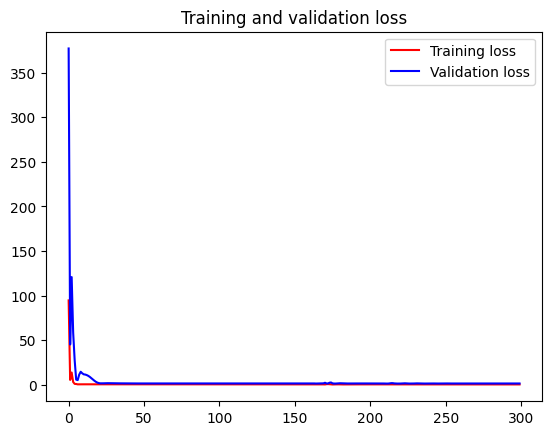

<Figure size 640x480 with 0 Axes>

In [196]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [197]:
Y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [198]:
Y_pred_flat = Y_pred.flatten()

r2_score(Y_test,Y_pred_flat)

0.9851833117017669

In [199]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  2.4064759862188083
-------------------------------------------------------------------------------------
Mean Square Error:  11.511057360345635


**2. Intel text**



---



In [200]:
intel_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,51.000000,51.500000,50.320000,50.950001,45.727489,46114100
1,2020-09-01,50.910000,51.000000,50.220001,50.790001,45.583893,30472800
2,2020-09-02,51.209999,52.680000,51.090000,52.250000,46.894234,53000700
3,2020-09-03,52.500000,52.619999,50.139999,50.389999,45.224884,47394300
4,2020-09-04,50.529999,51.230000,49.490002,50.080002,44.946667,43318400


In [201]:
print('Null Values:', intel_df.isnull().values.sum())

Null Values: 0


In [202]:
figure = px.line(nvidia_df, x=intel_df.Date, y=intel_df.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='INTEL stocks Close Price in the last 4 years 2020-2024', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [203]:
intel_df.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)
intel_df


,Open,High,Low,Close
0,51.000000,51.500000,50.320000,50.950001
1,50.910000,51.000000,50.220001,50.790001
2,51.209999,52.680000,51.090000,52.250000
3,52.500000,52.619999,50.139999,50.389999
4,50.529999,51.230000,49.490002,50.080002
...,...,...,...,...
1002,20.530001,20.559999,19.950001,20.129999
1003,20.129999,20.260000,19.840000,20.070000
1004,19.980000,20.110001,19.510000,19.610001
1005,19.760000,20.600000,19.750000,20.129999


**2.1 Intel Close Price Prediction using Polynominal Regression**



---



In [323]:
intel_y=intel_df["Close"]
intel_X=intel_df.copy()
intel_X.drop(["Close"], axis=1, inplace=True)
intel_y=intel_y.values.reshape(-1, 1)
intel_y

array([[50.950001],
       [50.790001],
       [52.25    ],
       ...,
       [19.610001],
       [20.129999],
       [21.84    ]])

In [324]:
intel_X

,Open,High,Low
0,51.000000,51.500000,50.320000
1,50.910000,51.000000,50.220001
2,51.209999,52.680000,51.090000
3,52.500000,52.619999,50.139999
4,50.529999,51.230000,49.490002
...,...,...,...
1002,20.530001,20.559999,19.950001
1003,20.129999,20.260000,19.840000
1004,19.980000,20.110001,19.510000
1005,19.760000,20.600000,19.750000


In [325]:
intel_X=scaler.fit_transform(intel_X)
intel_y=scaler.fit_transform(intel_y)

In [326]:
X_train, X_test, Y_train, Y_test = train_test_split(nvidia_X, nvidia_y, test_size=0.2)

polynominal_regression = PolynomialFeatures(5)
X_poly_train  = polynominal_regression.fit_transform(X_train)
X_poly_test  = polynominal_regression.fit_transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_poly_train, Y_train)

Y_pred = linear_regression.predict(X_poly_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_poly_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_poly_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9998335111136223
R2 score for the testing dataset:  0.99809122431335
  
MSE for the training dataset:  0.00016538248287590088
MSE for the testing dataset:  0.001959326327511719


**2.2 Intel Close Price Prediction using XGBoost**



---



In [208]:
intel_df

,Open,High,Low,Close
0,51.000000,51.500000,50.320000,50.950001
1,50.910000,51.000000,50.220001,50.790001
2,51.209999,52.680000,51.090000,52.250000
3,52.500000,52.619999,50.139999,50.389999
4,50.529999,51.230000,49.490002,50.080002
...,...,...,...,...
1002,20.530001,20.559999,19.950001,20.129999
1003,20.129999,20.260000,19.840000,20.070000
1004,19.980000,20.110001,19.510000,19.610001
1005,19.760000,20.600000,19.750000,20.129999


In [209]:
intel_y=intel_df["Close"]
intel_X=intel_df.copy()
intel_X.drop(["Close"], axis=1, inplace=True)
intel_y=intel_y.values.reshape(-1, 1)
intel_y

array([[50.950001],
       [50.790001],
       [52.25    ],
       ...,
       [19.610001],
       [20.129999],
       [21.84    ]])

In [210]:
intel_X

,Open,High,Low
0,51.000000,51.500000,50.320000
1,50.910000,51.000000,50.220001
2,51.209999,52.680000,51.090000
3,52.500000,52.619999,50.139999
4,50.529999,51.230000,49.490002
...,...,...,...
1002,20.530001,20.559999,19.950001
1003,20.129999,20.260000,19.840000
1004,19.980000,20.110001,19.510000
1005,19.760000,20.600000,19.750000


In [211]:
X_train, X_test, Y_train, Y_test= train_test_split(intel_X, intel_y, test_size=0.20)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [212]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [0, 1, 2]
}

xgb = XGBRegressor(objective='reg:squarederror')


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))
print("R² Score: ", r2_score(Y_test, Y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'alpha': 1, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Mean Absolute Error:  0.3418383456825784
Mean Squared Error:  0.21468840420998161
Root Mean Squared Error:  0.46334480056431154
R² Score:  0.9983235259972808


**2.3 Intel Close Price Prediction using LSTM**



---



In [213]:
intel_df

,Open,High,Low,Close
0,51.000000,51.500000,50.320000,50.950001
1,50.910000,51.000000,50.220001,50.790001
2,51.209999,52.680000,51.090000,52.250000
3,52.500000,52.619999,50.139999,50.389999
4,50.529999,51.230000,49.490002,50.080002
...,...,...,...,...
1002,20.530001,20.559999,19.950001,20.129999
1003,20.129999,20.260000,19.840000,20.070000
1004,19.980000,20.110001,19.510000,19.610001
1005,19.760000,20.600000,19.750000,20.129999


In [214]:
intel_data = intel_df[['Close']].copy()
intel_data

,Close
0,50.950001
1,50.790001
2,52.250000
3,50.389999
4,50.080002
...,...
1002,20.129999
1003,20.070000
1004,19.610001
1005,20.129999


In [215]:
for i in range(1, 6):
  intel_data['Close' + str(i) + '_day_ago'] = intel_data['Close'].shift(i)
intel_data = intel_data.dropna()
intel_data.head(5)

,Close,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,48.910000,50.080002,50.389999,52.250000,50.790001,50.950001
6,49.619999,48.910000,50.080002,50.389999,52.250000,50.790001
7,48.959999,49.619999,48.910000,50.080002,50.389999,52.250000
8,49.279999,48.959999,49.619999,48.910000,50.080002,50.389999
9,49.410000,49.279999,48.959999,49.619999,48.910000,50.080002


In [216]:
train_size = int(len(intel_data) * 0.8)
train = intel_data[:train_size]
test = intel_data[train_size:]

X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]

Y_train = train['Close']
Y_test = test['Close']

In [217]:
X_train

,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,50.080002,50.389999,52.250000,50.790001,50.950001
6,48.910000,50.080002,50.389999,52.250000,50.790001
7,49.619999,48.910000,50.080002,50.389999,52.250000
8,48.959999,49.619999,48.910000,50.080002,50.389999
9,49.279999,48.959999,49.619999,48.910000,50.080002
...,...,...,...,...,...
801,38.139999,37.700001,37.290001,36.500000,35.689999
802,37.950001,38.139999,37.700001,37.290001,36.500000
803,38.770000,37.950001,38.139999,37.700001,37.290001
804,37.919998,38.770000,37.950001,38.139999,37.700001


In [218]:
Y_train

,Close
5,48.910000
6,49.619999
7,48.959999
8,49.279999
9,49.410000
...,...
801,37.950001
802,38.770000
803,37.919998
804,37.799999


In [219]:
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [220]:
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))


model.add(LSTM(32, activation='relu'))

model.add(Dense(1 ,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [221]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 5, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,201 (340.63 KB)

 Trainable params: 87,201 (340.63 KB)

 Non-trainable params: 0 (0.00 B)

In [222]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [223]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1121.0811 - mean_absolute_error: 29.3890 - val_loss: 10.7677 - val_mean_absolute_error: 2.9871
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7578 - mean_absolute_error: 1.6506 - val_loss: 3.0695 - val_mean_absolute_error: 1.3874
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.4917 - mean_absolute_error: 3.2527 - val_loss: 3.7986 - val_mean_absolute_error: 1.6565
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.4260 - mean_absolute_error: 2.0225 - val_loss: 3.0679 - val_mean_absolute_error: 1.4947
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.5579 - mean_absolute_error: 1.9354 - val_loss: 2.5526 - val_mean_absolute_error: 1.3076
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.8349 - mean_absolute_error: 2.9700 - val_loss: 4.3401 - val_mean_absolute_error: 1.8242
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.5479 - mean_absolute_error: 2.

<Figure size 640x480 with 0 Axes>

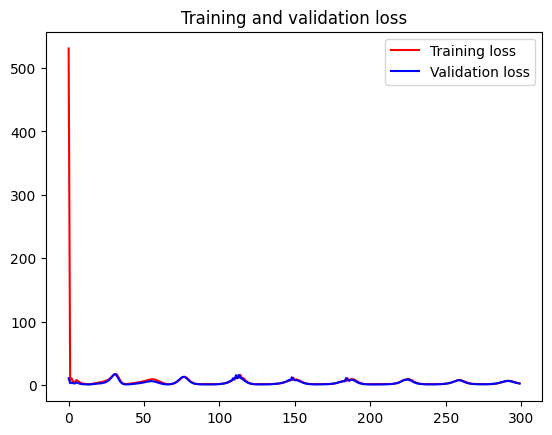

<Figure size 640x480 with 0 Axes>

In [224]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


In [225]:
Y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


In [226]:
Y_pred_flat = Y_pred.flatten()

r2_score(Y_test,Y_pred_flat)

0.943666988416477

In [227]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  1.618419716326206
-------------------------------------------------------------------------------------
Mean Square Error:  3.9776389438365936


**3. Tesla**



---


In [228]:
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,148.203339,166.713333,146.703339,166.106674,166.106674,355123200
1,2020-09-01,167.380005,167.496674,156.836670,158.350006,158.350006,269523300
2,2020-09-02,159.663330,159.679993,135.039993,149.123337,149.123337,288528300
3,2020-09-03,135.743332,143.933334,134.000000,135.666672,135.666672,262788300
4,2020-09-04,134.270004,142.666672,124.006668,139.440002,139.440002,330965700


In [229]:
print('Null Values:', tesla_df.isnull().values.sum())

Null Values: 0


In [230]:
figure = px.line(tesla_df, x=tesla_df.Date, y=tesla_df.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='TESLA stocks Close Price in the last 4 years 2020-2024', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [231]:
tesla_df.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)
tesla_df

,Open,High,Low,Close
0,148.203339,166.713333,146.703339,166.106674
1,167.380005,167.496674,156.836670,158.350006
2,159.663330,159.679993,135.039993,149.123337
3,135.743332,143.933334,134.000000,135.666672
4,134.270004,142.666672,124.006668,139.440002
...,...,...,...,...
1002,218.750000,219.089996,211.009995,213.210007
1003,213.250000,215.660004,206.940002,209.210007
1004,209.720001,211.839996,202.589996,205.750000
1005,209.800003,214.889999,205.970001,206.279999


**3.1 Tesla Close Price Prediction using Polynominal Regression**



---



In [232]:
tesla_y=tesla_df["Close"]
tesla_X=tesla_df.copy()
tesla_X.drop(["Close"], axis=1, inplace=True)
tesla_y=tesla_y.values.reshape(-1, 1)
tesla_y

array([[166.106674],
       [158.350006],
       [149.123337],
       ...,
       [205.75    ],
       [206.279999],
       [209.929504]])

In [233]:
tesla_X

,Open,High,Low
0,148.203339,166.713333,146.703339
1,167.380005,167.496674,156.836670
2,159.663330,159.679993,135.039993
3,135.743332,143.933334,134.000000
4,134.270004,142.666672,124.006668
...,...,...,...
1002,218.750000,219.089996,211.009995
1003,213.250000,215.660004,206.940002
1004,209.720001,211.839996,202.589996
1005,209.800003,214.889999,205.970001


In [234]:
tesla_X=scaler.fit_transform(tesla_X)
tesla_y=scaler.fit_transform(tesla_y)

In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(tesla_X, tesla_y, test_size=0.2)

polynominal_regression = PolynomialFeatures(5)
X_poly_train  = polynominal_regression.fit_transform(X_train)
X_poly_test  = polynominal_regression.fit_transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_poly_train, Y_train)

Y_pred = linear_regression.predict(X_poly_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_poly_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_poly_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9971263357966695
R2 score for the testing dataset:  0.9960999946028813
  
MSE for the training dataset:  0.002846875534627301
MSE for the testing dataset:  0.004041472160703527


**3.2 Tesla Close Price Prediction using XGBoost**



---



In [327]:
tesla_df

,Open,High,Low,Close
0,148.203339,166.713333,146.703339,166.106674
1,167.380005,167.496674,156.836670,158.350006
2,159.663330,159.679993,135.039993,149.123337
3,135.743332,143.933334,134.000000,135.666672
4,134.270004,142.666672,124.006668,139.440002
...,...,...,...,...
1002,218.750000,219.089996,211.009995,213.210007
1003,213.250000,215.660004,206.940002,209.210007
1004,209.720001,211.839996,202.589996,205.750000
1005,209.800003,214.889999,205.970001,206.279999


In [328]:
tesla_y=tesla_df["Close"]
tesla_X=tesla_df.copy()
tesla_X.drop(["Close"], axis=1, inplace=True)
tesla_y=tesla_y.values.reshape(-1, 1)
tesla_y

array([[166.106674],
       [158.350006],
       [149.123337],
       ...,
       [205.75    ],
       [206.279999],
       [209.929504]])

In [329]:
tesla_X

,Open,High,Low
0,148.203339,166.713333,146.703339
1,167.380005,167.496674,156.836670
2,159.663330,159.679993,135.039993
3,135.743332,143.933334,134.000000
4,134.270004,142.666672,124.006668
...,...,...,...
1002,218.750000,219.089996,211.009995
1003,213.250000,215.660004,206.940002
1004,209.720001,211.839996,202.589996
1005,209.800003,214.889999,205.970001


In [330]:
X_train, X_test, Y_train, Y_test= train_test_split(tesla_X, tesla_y, test_size=0.20)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [332]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [0, 1, 2]
}

xgb = XGBRegressor(objective='reg:squarederror')


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))
print("R² Score: ", r2_score(Y_test, Y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'alpha': 1, 'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Mean Absolute Error:  3.294773721836807
Mean Squared Error:  22.721218501609144
Root Mean Squared Error:  4.766677931390912
R² Score:  0.9938756732718982


**3.3 Tesla Close Price Prediction using LSTM**



---



In [241]:
tesla_df

,Open,High,Low,Close
0,148.203339,166.713333,146.703339,166.106674
1,167.380005,167.496674,156.836670,158.350006
2,159.663330,159.679993,135.039993,149.123337
3,135.743332,143.933334,134.000000,135.666672
4,134.270004,142.666672,124.006668,139.440002
...,...,...,...,...
1002,218.750000,219.089996,211.009995,213.210007
1003,213.250000,215.660004,206.940002,209.210007
1004,209.720001,211.839996,202.589996,205.750000
1005,209.800003,214.889999,205.970001,206.279999


In [242]:
tesla_data = tesla_df[['Close']].copy()
tesla_data

,Close
0,166.106674
1,158.350006
2,149.123337
3,135.666672
4,139.440002
...,...
1002,213.210007
1003,209.210007
1004,205.750000
1005,206.279999


In [243]:
for i in range(1, 6):
  tesla_data['Close' + str(i) + '_day_ago'] = tesla_data['Close'].shift(i)
tesla_data = tesla_data.dropna()
tesla_data.head(5)

,Close,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,110.070000,139.440002,135.666672,149.123337,158.350006,166.106674
6,122.093330,110.070000,139.440002,135.666672,149.123337,158.350006
7,123.779999,122.093330,110.070000,139.440002,135.666672,149.123337
8,124.239998,123.779999,122.093330,110.070000,139.440002,135.666672
9,139.873337,124.239998,123.779999,122.093330,110.070000,139.440002


In [244]:
train_size = int(len(tesla_data) * 0.8)
train = tesla_data[:train_size]
test = tesla_data[train_size:]

X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]

Y_train = train['Close']
Y_test = test['Close']

In [245]:
X_train

,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,139.440002,135.666672,149.123337,158.350006,166.106674
6,110.070000,139.440002,135.666672,149.123337,158.350006
7,122.093330,110.070000,139.440002,135.666672,149.123337
8,123.779999,122.093330,110.070000,139.440002,135.666672
9,124.239998,123.779999,122.093330,110.070000,139.440002
...,...,...,...,...,...
801,219.960007,218.509995,205.660004,200.839996,197.360001
802,219.270004,219.960007,218.509995,205.660004,200.839996
803,222.179993,219.270004,219.960007,218.509995,205.660004
804,222.110001,222.179993,219.270004,219.960007,218.509995


In [246]:
Y_train

,Close
5,110.070000
6,122.093330
7,123.779999
8,124.239998
9,139.873337
...,...
801,219.270004
802,222.179993
803,222.110001
804,209.979996


In [247]:
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [248]:
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))


model.add(LSTM(32, activation='relu'))

model.add(Dense(1 ,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [249]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 5, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,201 (340.63 KB)

 Trainable params: 87,201 (340.63 KB)

 Non-trainable params: 0 (0.00 B)

In [250]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [251]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 36585.0547 - mean_absolute_error: 185.0384 - val_loss: 1895.4460 - val_mean_absolute_error: 41.8285
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1106.0674 - mean_absolute_error: 24.9367 - val_loss: 72.5074 - val_mean_absolute_error: 6.5896
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 99.5755 - mean_absolute_error: 7.1846 - val_loss: 79.8651 - val_mean_absolute_error: 6.9473
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 104.6083 - mean_absolute_error: 7.5790 - val_loss: 84.6770 - val_mean_absolute_error: 7.2109
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 98.6129 - mean_absolute_error: 7.2492 - val_loss: 63.6941 - val_mean_absolute_error: 6.0444
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 94.9589 - mean_absolute_error: 7.0538 - val_loss: 69.5981 - val_mean_absolute_error: 6.4009
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 95.0297 - mean_a

<Figure size 640x480 with 0 Axes>

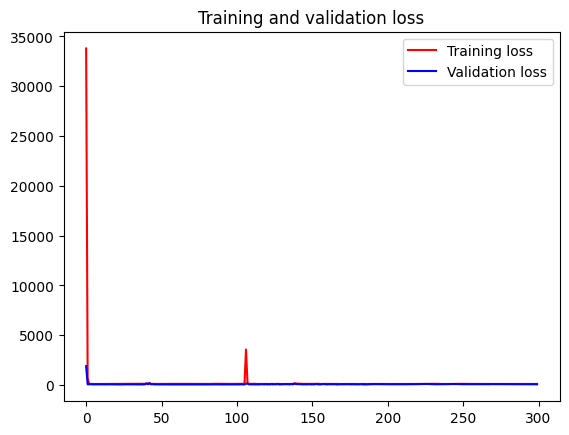

<Figure size 640x480 with 0 Axes>

In [252]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [253]:
Y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


In [254]:
Y_pred_flat = Y_pred.flatten()

r2_score(Y_test,Y_pred_flat)

0.9355020422077149

In [255]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  5.738796299420866
-------------------------------------------------------------------------------------
Mean Square Error:  58.76355345427781


**4. Amazon**



---



In [256]:
amazon_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,170.449493,174.750000,170.250000,172.548004,172.548004,83718000
1,2020-09-01,174.479004,175.693497,173.350006,174.955994,174.955994,68644000
2,2020-09-02,177.350006,177.612503,174.334503,176.572495,176.572495,78630000
3,2020-09-03,174.250000,174.420502,165.149994,168.399994,168.399994,163222000
4,2020-09-04,165.899994,169.074997,155.556503,164.731003,164.731003,175636000


In [257]:
print('Null Values:', amazon_df.isnull().values.sum())

Null Values: 0


In [258]:
figure = px.line(amazon_df, x=amazon_df.Date, y=amazon_df.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='AMAZON stocks Close Price in the last 4 years 2020-2024', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [259]:
amazon_df.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)
amazon_df

,Open,High,Low,Close
0,170.449493,174.750000,170.250000,172.548004
1,174.479004,175.693497,173.350006,174.955994
2,177.350006,177.612503,174.334503,176.572495
3,174.250000,174.420502,165.149994,168.399994
4,165.899994,169.074997,155.556503,164.731003
...,...,...,...,...
1002,176.699997,177.470001,174.300003,175.500000
1003,174.149994,174.889999,172.250000,173.119995
1004,173.690002,173.690002,168.919998,170.800003
1005,173.220001,174.289993,170.809998,172.119995


**4.1 Amazon Close Price Prediction using Polynominal Regression**



---



In [260]:
amazon_y=amazon_df["Close"]
amazon_X=amazon_df.copy()
amazon_X.drop(["Close"], axis=1, inplace=True)
amazon_y=amazon_y.values.reshape(-1, 1)
amazon_y


array([[172.548004],
       [174.955994],
       [176.572495],
       ...,
       [170.800003],
       [172.119995],
       [175.068604]])

In [261]:
amazon_X

,Open,High,Low
0,170.449493,174.750000,170.250000
1,174.479004,175.693497,173.350006
2,177.350006,177.612503,174.334503
3,174.250000,174.420502,165.149994
4,165.899994,169.074997,155.556503
...,...,...,...
1002,176.699997,177.470001,174.300003
1003,174.149994,174.889999,172.250000
1004,173.690002,173.690002,168.919998
1005,173.220001,174.289993,170.809998


In [262]:
amazon_X=scaler.fit_transform(amazon_X)
amazon_y=scaler.fit_transform(amazon_y)

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(amazon_X, amazon_y, test_size=0.2)

polynominal_regression = PolynomialFeatures(5)
X_poly_train  = polynominal_regression.fit_transform(X_train)
X_poly_test  = polynominal_regression.fit_transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_poly_train, Y_train)

Y_pred = linear_regression.predict(X_poly_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_poly_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_poly_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9988685513652681
R2 score for the testing dataset:  0.9986383357165354
  
MSE for the training dataset:  0.0011296676065655222
MSE for the testing dataset:  0.0013694659664687861


**4.2 Amazon Close Price Prediction using XGBoost**



---



In [264]:
amazon_df

,Open,High,Low,Close
0,170.449493,174.750000,170.250000,172.548004
1,174.479004,175.693497,173.350006,174.955994
2,177.350006,177.612503,174.334503,176.572495
3,174.250000,174.420502,165.149994,168.399994
4,165.899994,169.074997,155.556503,164.731003
...,...,...,...,...
1002,176.699997,177.470001,174.300003,175.500000
1003,174.149994,174.889999,172.250000,173.119995
1004,173.690002,173.690002,168.919998,170.800003
1005,173.220001,174.289993,170.809998,172.119995


In [265]:
amazon_y=amazon_df["Close"]
amazon_X=amazon_df.copy()
amazon_X.drop(["Close"], axis=1, inplace=True)
amazon_y=amazon_y.values.reshape(-1, 1)
amazon_y

array([[172.548004],
       [174.955994],
       [176.572495],
       ...,
       [170.800003],
       [172.119995],
       [175.068604]])

In [266]:
amazon_X

,Open,High,Low
0,170.449493,174.750000,170.250000
1,174.479004,175.693497,173.350006
2,177.350006,177.612503,174.334503
3,174.250000,174.420502,165.149994
4,165.899994,169.074997,155.556503
...,...,...,...
1002,176.699997,177.470001,174.300003
1003,174.149994,174.889999,172.250000
1004,173.690002,173.690002,168.919998
1005,173.220001,174.289993,170.809998


In [267]:
X_train, X_test, Y_train, Y_test= train_test_split(amazon_X, amazon_y, test_size=0.20)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [268]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [0, 1, 2]
}

xgb = XGBRegressor(objective='reg:squarederror')


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))
print("R² Score: ", r2_score(Y_test, Y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'alpha': 2, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Absolute Error:  1.1261853603805696
Mean Squared Error:  2.114505144375117
Root Mean Squared Error:  1.454133812403493
R² Score:  0.9974463631017889


**4.3 Amazon Close Price Prediction using LSTM**



---



In [333]:
amazon_df

,Open,High,Low,Close
0,170.449493,174.750000,170.250000,172.548004
1,174.479004,175.693497,173.350006,174.955994
2,177.350006,177.612503,174.334503,176.572495
3,174.250000,174.420502,165.149994,168.399994
4,165.899994,169.074997,155.556503,164.731003
...,...,...,...,...
1002,176.699997,177.470001,174.300003,175.500000
1003,174.149994,174.889999,172.250000,173.119995
1004,173.690002,173.690002,168.919998,170.800003
1005,173.220001,174.289993,170.809998,172.119995


In [334]:
amazon_data = amazon_df[['Close']].copy()
amazon_data

,Close
0,172.548004
1,174.955994
2,176.572495
3,168.399994
4,164.731003
...,...
1002,175.500000
1003,173.119995
1004,170.800003
1005,172.119995


In [335]:
for i in range(1, 6):
  amazon_data['Close' + str(i) + '_day_ago'] = amazon_data['Close'].shift(i)
amazon_data = amazon_data.dropna()
amazon_data.head(5)

,Close,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,157.492004,164.731003,168.399994,176.572495,174.955994,172.548004
6,163.430496,157.492004,164.731003,168.399994,176.572495,174.955994
7,158.755493,163.430496,157.492004,164.731003,168.399994,176.572495
8,155.811005,158.755493,163.430496,157.492004,164.731003,168.399994
9,155.148499,155.811005,158.755493,163.430496,157.492004,164.731003


In [336]:
train_size = int(len(amazon_data) * 0.8)
train = amazon_data[:train_size]
test = amazon_data[train_size:]

X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]

Y_train = train['Close']
Y_test = test['Close']

In [337]:
X_train

,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,164.731003,168.399994,176.572495,174.955994,172.548004
6,157.492004,164.731003,168.399994,176.572495,174.955994
7,163.430496,157.492004,164.731003,168.399994,176.572495
8,158.755493,163.430496,157.492004,164.731003,168.399994
9,155.811005,158.755493,163.430496,157.492004,164.731003
...,...,...,...,...,...
801,138.600006,138.070007,137.000000,133.089996,132.710007
802,139.740005,138.600006,138.070007,137.000000,133.089996
803,142.710007,139.740005,138.600006,138.070007,137.000000
804,142.080002,142.710007,139.740005,138.600006,138.070007


In [338]:
Y_train

,Close
5,157.492004
6,163.430496
7,158.755493
8,155.811005
9,155.148499
...,...
801,139.740005
802,142.710007
803,142.080002
804,140.600006


In [339]:
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [340]:
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))


model.add(LSTM(32, activation='relu'))

model.add(Dense(1 ,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [341]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 5, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,201 (340.63 KB)

 Trainable params: 87,201 (340.63 KB)

 Non-trainable params: 0 (0.00 B)

In [342]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [343]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 13750.6279 - mean_absolute_error: 112.5080 - val_loss: 555.9717 - val_mean_absolute_error: 23.3428
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 438.9897 - mean_absolute_error: 17.9811 - val_loss: 14.2089 - val_mean_absolute_error: 3.0456
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.7319 - mean_absolute_error: 3.4802 - val_loss: 14.9943 - val_mean_absolute_error: 3.1481
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.6940 - mean_absolute_error: 3.8528 - val_loss: 8.2609 - val_mean_absolute_error: 2.2343
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.9201 - mean_absolute_error: 3.1338 - val_loss: 8.6945 - val_mean_absolute_error: 2.3006
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 16.5798 - mean_absolute_error: 3.0880 - val_loss: 9.9908 - val_mean_absolute_error: 2.4772
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.4453 - mean_absolut

<Figure size 640x480 with 0 Axes>

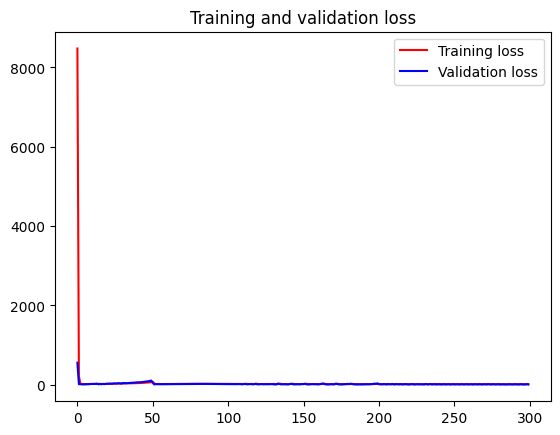

<Figure size 640x480 with 0 Axes>

In [344]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [345]:
Y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [346]:
Y_pred_flat = Y_pred.flatten()

r2_score(Y_test,Y_pred_flat)

0.9449294933978336

In [347]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  2.7013971259959977
-------------------------------------------------------------------------------------
Mean Square Error:  12.86131350474548


**5. Apple**



---



In [284]:
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,127.580002,131.000000,126.000000,129.039993,126.103676,225702700
1,2020-09-01,132.759995,134.800003,130.529999,134.179993,131.126709,151948100
2,2020-09-02,137.589996,137.979996,127.000000,131.399994,128.409988,200119000
3,2020-09-03,126.910004,128.839996,120.500000,120.879997,118.129349,257599600
4,2020-09-04,120.070000,123.699997,110.889999,120.959999,118.207527,332607200


In [285]:
print('Null Values:', apple_df.isnull().values.sum())

Null Values: 0


In [286]:
figure = px.line(apple_df, x=apple_df.Date, y=apple_df.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='APPLE stocks Close Price in the last 4 years 2020-2024', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [287]:
apple_df.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)
apple_df

,Open,High,Low,Close
0,127.580002,131.000000,126.000000,129.039993
1,132.759995,134.800003,130.529999,134.179993
2,137.589996,137.979996,127.000000,131.399994
3,126.910004,128.839996,120.500000,120.879997
4,120.070000,123.699997,110.889999,120.959999
...,...,...,...,...
1002,226.759995,227.279999,223.889999,227.179993
1003,226.000000,228.850006,224.889999,228.029999
1004,227.919998,229.860001,225.679993,226.490005
1005,230.100006,232.919998,228.880005,229.789993


**5.1 Apple Close Price Prediction using Polynominal Regression**



---



In [348]:
apple_y=apple_df["Close"]
apple_X=apple_df.copy()
apple_X.drop(["Close"], axis=1, inplace=True)
apple_y=apple_y.values.reshape(-1, 1)
apple_y

array([[129.039993],
       [134.179993],
       [131.399994],
       ...,
       [226.490005],
       [229.789993],
       [228.684998]])

In [349]:
apple_X

,Open,High,Low
0,127.580002,131.000000,126.000000
1,132.759995,134.800003,130.529999
2,137.589996,137.979996,127.000000
3,126.910004,128.839996,120.500000
4,120.070000,123.699997,110.889999
...,...,...,...
1002,226.759995,227.279999,223.889999
1003,226.000000,228.850006,224.889999
1004,227.919998,229.860001,225.679993
1005,230.100006,232.919998,228.880005


In [350]:
apple_X=scaler.fit_transform(apple_X)
apple_y=scaler.fit_transform(apple_y)

In [351]:
X_train, X_test, Y_train, Y_test = train_test_split(apple_X, apple_y, test_size=0.2)

polynominal_regression = PolynomialFeatures(5)
X_poly_train  = polynominal_regression.fit_transform(X_train)
X_poly_test  = polynominal_regression.fit_transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_poly_train, Y_train)

Y_pred = linear_regression.predict(X_poly_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_poly_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_poly_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9988714174954456
R2 score for the testing dataset:  0.9987979877289371
  
MSE for the training dataset:  0.0011155806103585954
MSE for the testing dataset:  0.0012523672387396466


**5.2 Apple Close Price Prediction using XGBoost**

In [292]:
apple_df

,Open,High,Low,Close
0,127.580002,131.000000,126.000000,129.039993
1,132.759995,134.800003,130.529999,134.179993
2,137.589996,137.979996,127.000000,131.399994
3,126.910004,128.839996,120.500000,120.879997
4,120.070000,123.699997,110.889999,120.959999
...,...,...,...,...
1002,226.759995,227.279999,223.889999,227.179993
1003,226.000000,228.850006,224.889999,228.029999
1004,227.919998,229.860001,225.679993,226.490005
1005,230.100006,232.919998,228.880005,229.789993


In [293]:
apple_y=apple_df["Close"]
apple_X=apple_df.copy()
apple_X.drop(["Close"], axis=1, inplace=True)
apple_y=apple_y.values.reshape(-1, 1)
apple_y

array([[129.039993],
       [134.179993],
       [131.399994],
       ...,
       [226.490005],
       [229.789993],
       [228.684998]])

In [294]:
apple_X

,Open,High,Low
0,127.580002,131.000000,126.000000
1,132.759995,134.800003,130.529999
2,137.589996,137.979996,127.000000
3,126.910004,128.839996,120.500000
4,120.070000,123.699997,110.889999
...,...,...,...
1002,226.759995,227.279999,223.889999
1003,226.000000,228.850006,224.889999
1004,227.919998,229.860001,225.679993
1005,230.100006,232.919998,228.880005


In [295]:
X_train, X_test, Y_train, Y_test= train_test_split(apple_X, apple_y, test_size=0.20)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [296]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [0, 1, 2]
}

xgb = XGBRegressor(objective='reg:squarederror')


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))
print("R² Score: ", r2_score(Y_test, Y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'alpha': 2, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Absolute Error:  1.0922829973313732
Mean Squared Error:  2.2359707583355695
Root Mean Squared Error:  1.495316273681113
R² Score:  0.9971445398847467


**5.3 Apple Close Price Prediction using LSTM**



---



In [397]:
apple_df

,Open,High,Low,Close
0,127.580002,131.000000,126.000000,129.039993
1,132.759995,134.800003,130.529999,134.179993
2,137.589996,137.979996,127.000000,131.399994
3,126.910004,128.839996,120.500000,120.879997
4,120.070000,123.699997,110.889999,120.959999
...,...,...,...,...
1002,226.759995,227.279999,223.889999,227.179993
1003,226.000000,228.850006,224.889999,228.029999
1004,227.919998,229.860001,225.679993,226.490005
1005,230.100006,232.919998,228.880005,229.789993


In [398]:
apple_data = apple_df[['Close']].copy()
apple_data

,Close
0,129.039993
1,134.179993
2,131.399994
3,120.879997
4,120.959999
...,...
1002,227.179993
1003,228.029999
1004,226.490005
1005,229.789993


In [399]:
for i in range(1, 6):
  apple_data['Close' + str(i) + '_day_ago'] = apple_data['Close'].shift(i)
apple_data = apple_data.dropna()
apple_data.head(5)

,Close,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,112.820000,120.959999,120.879997,131.399994,134.179993,129.039993
6,117.320000,112.820000,120.959999,120.879997,131.399994,134.179993
7,113.489998,117.320000,112.820000,120.959999,120.879997,131.399994
8,112.000000,113.489998,117.320000,112.820000,120.959999,120.879997
9,115.360001,112.000000,113.489998,117.320000,112.820000,120.959999


In [400]:
train_size = int(len(apple_data) * 0.8)
train = apple_data[:train_size]
test = apple_data[train_size:]

X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]

Y_train = train['Close']
Y_test = test['Close']

In [401]:
X_train

,Close1_day_ago,Close2_day_ago,Close3_day_ago,Close4_day_ago,Close5_day_ago
5,120.959999,120.879997,131.399994,134.179993,129.039993
6,112.820000,120.959999,120.879997,131.399994,134.179993
7,117.320000,112.820000,120.959999,120.879997,131.399994
8,113.489998,117.320000,112.820000,120.959999,120.879997
9,112.000000,113.489998,117.320000,112.820000,120.959999
...,...,...,...,...,...
801,176.649994,177.570007,173.970001,170.770004,170.289993
802,179.229996,176.649994,177.570007,173.970001,170.770004
803,181.820007,179.229996,176.649994,177.570007,173.970001
804,182.889999,181.820007,179.229996,176.649994,177.570007


In [402]:
Y_train

,Close
5,112.820000
6,117.320000
7,113.489998
8,112.000000
9,115.360001
...,...
801,179.229996
802,181.820007
803,182.889999
804,182.410004


In [403]:
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [404]:
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))


model.add(LSTM(32, activation='relu'))

model.add(Dense(1 ,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [405]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 5, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,201 (340.63 KB)

 Trainable params: 87,201 (340.63 KB)

 Non-trainable params: 0 (0.00 B)

In [406]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [407]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 13700.8604 - mean_absolute_error: 114.4643 - val_loss: 629.8705 - val_mean_absolute_error: 24.8670
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 102.6726 - mean_absolute_error: 6.4419 - val_loss: 9.8554 - val_mean_absolute_error: 2.3978
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 10.0266 - mean_absolute_error: 2.4284 - val_loss: 10.9493 - val_mean_absolute_error: 2.5369
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0314 - mean_absolute_error: 2.4582 - val_loss: 13.8647 - val_mean_absolute_error: 2.9294
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.4210 - mean_absolute_error: 2.3651 - val_loss: 12.5816 - val_mean_absolute_error: 2.7806
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.5045 - mean_absolute_error: 2.3872 - val_loss: 12.7103 - val_mean_absolute_error: 2.8020
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.3205 - mean_absolute_

<Figure size 640x480 with 0 Axes>

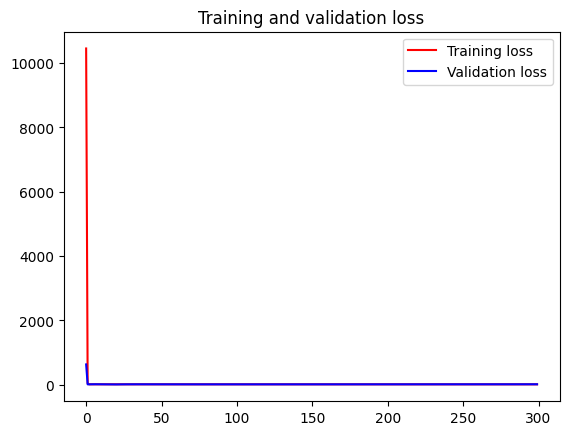

<Figure size 640x480 with 0 Axes>

In [408]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [409]:
Y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [414]:
Y_pred_flat = Y_pred.flatten()

r2_score(Y_test,Y_pred_flat)

0.9074839346822899

In [416]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  4.712587941906677
-------------------------------------------------------------------------------------
Mean Square Error:  32.77885251449083
